In [3]:
library(caret)

Warning message:
“package ‘caret’ was built under R version 4.0.5”
Loading required package: ggplot2

Warning message:
“package ‘ggplot2’ was built under R version 4.0.5”


In [30]:
install.packages('e1071', dependencies=TRUE)

also installing the dependencies ‘proxy’, ‘cluster’, ‘mlbench’, ‘randomForest’, ‘SparseM’, ‘xtable’, ‘slam’


Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [38]:
install.packages('caret', dependencies=TRUE)

Warning message in install.packages("caret", dependencies = TRUE):
“installation of package ‘caret’ had non-zero exit status”
Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [39]:
library(e1071)

In [40]:
library(ellipse)

In [41]:
data(iris)

In [42]:
dataset <- iris

In [43]:
validation_index <- createDataPartition(dataset$Species, p=0.80, list=FALSE)
validation <- dataset[-validation_index,]
dataset <- dataset[validation_index,]

In [44]:
dim(dataset)

[1] 120   5

In [45]:
sapply(dataset,class)

Sepal.Length  Sepal.Width Petal.Length  Petal.Width      Species 
   "numeric"    "numeric"    "numeric"    "numeric"     "factor"

In [46]:
#first 5 rows of data
head(dataset)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa
6,5.4,3.9,1.7,0.4,setosa
7,4.6,3.4,1.4,0.3,setosa


In [47]:
levels(dataset$Species)

[1] "setosa"     "versicolor" "virginica"

In [48]:
#distribution of various classes
percentage <- prop.table(table(dataset$Species))*100
cbind(freq=table(dataset$Species),percentage=percentage)

,freq,percentage
setosa,40,33.33333
versicolor,40,33.33333
virginica,40,33.33333


In [49]:
summary(dataset)

  Sepal.Length    Sepal.Width    Petal.Length    Petal.Width          Species  
 Min.   :4.300   Min.   :2.00   Min.   :1.000   Min.   :0.100   setosa    :40  
 1st Qu.:5.100   1st Qu.:2.80   1st Qu.:1.500   1st Qu.:0.300   versicolor:40  
 Median :5.800   Median :3.00   Median :4.300   Median :1.300   virginica :40  
 Mean   :5.856   Mean   :3.06   Mean   :3.767   Mean   :1.192                  
 3rd Qu.:6.425   3rd Qu.:3.30   3rd Qu.:5.100   3rd Qu.:1.800                  
 Max.   :7.900   Max.   :4.40   Max.   :6.900   Max.   :2.500                  

In [50]:
x <- dataset[,1:4]
y <- dataset[,5]

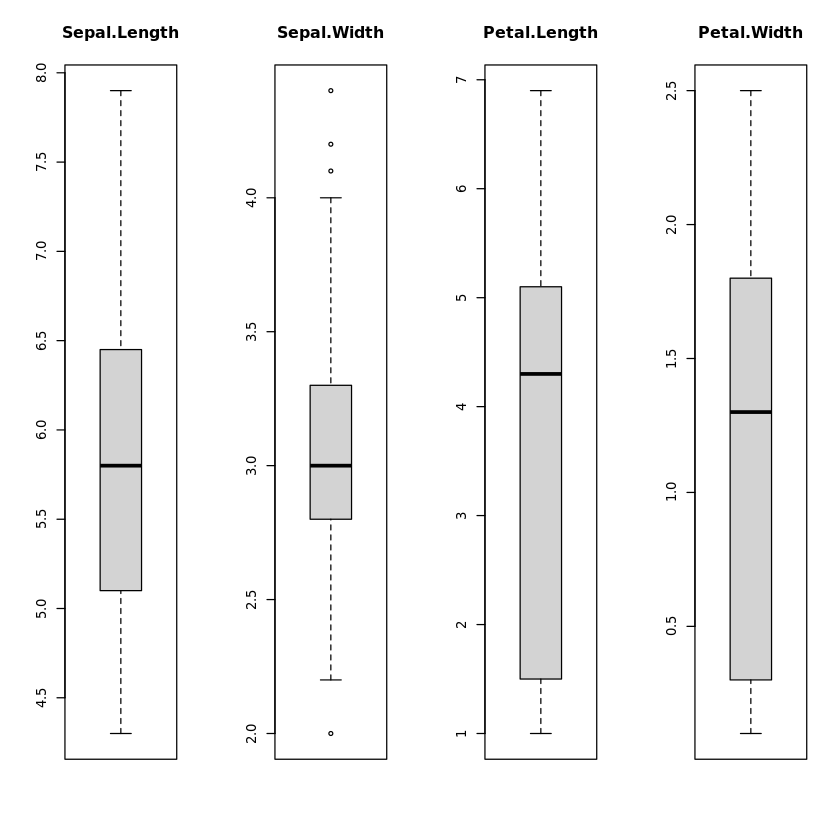

In [51]:
#boxplot for data
par(mfrow=c(1,4))
    for(i in 1:4){
        boxplot(x[,i], main=names(iris)[i])
    }

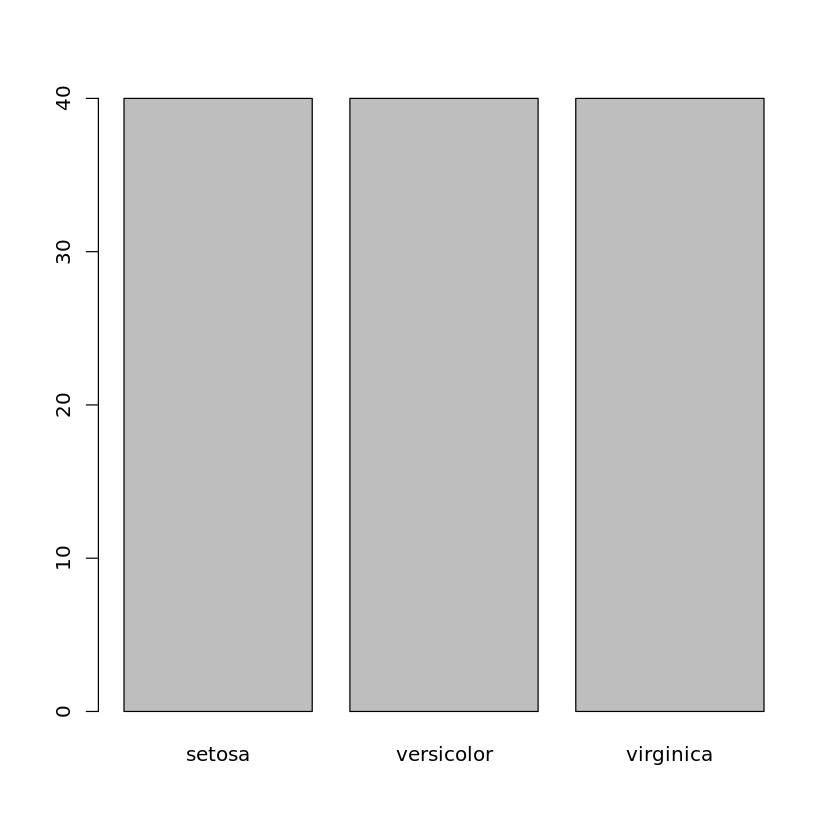

In [52]:
plot(y)

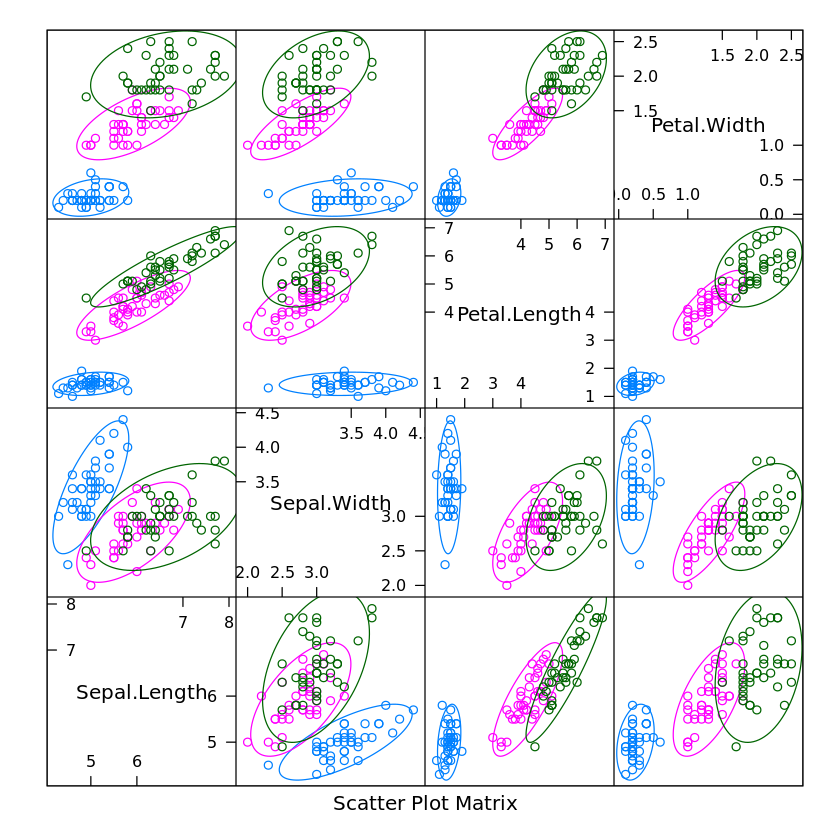

In [53]:
#scatterplot matrix
featurePlot(x=x, y=y, plot="ellipse")

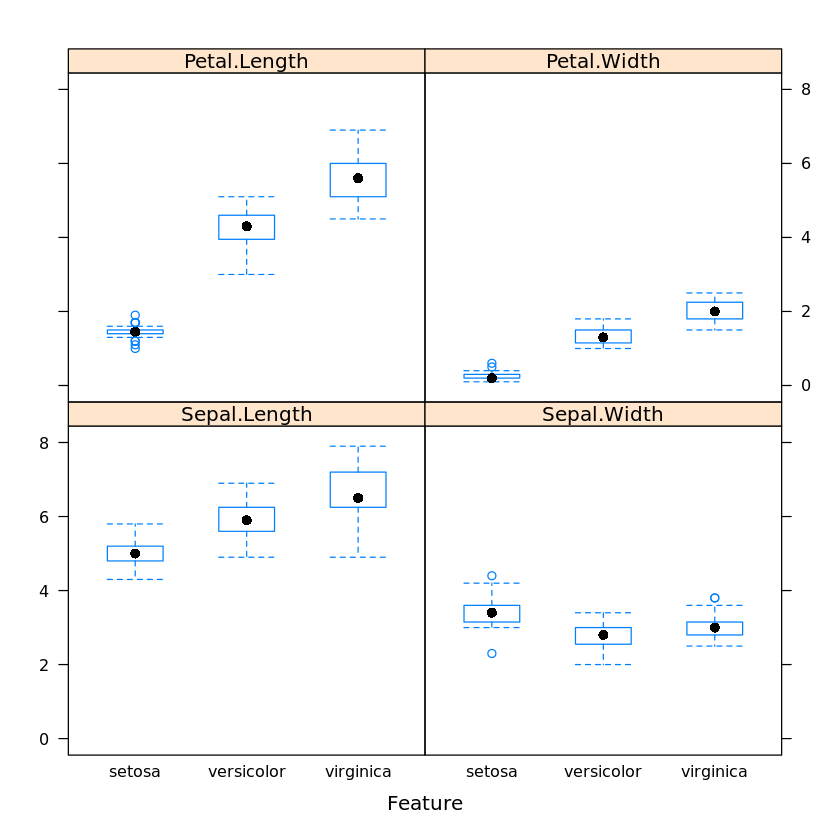

In [54]:
featurePlot(x=x, y=y, plot="box")

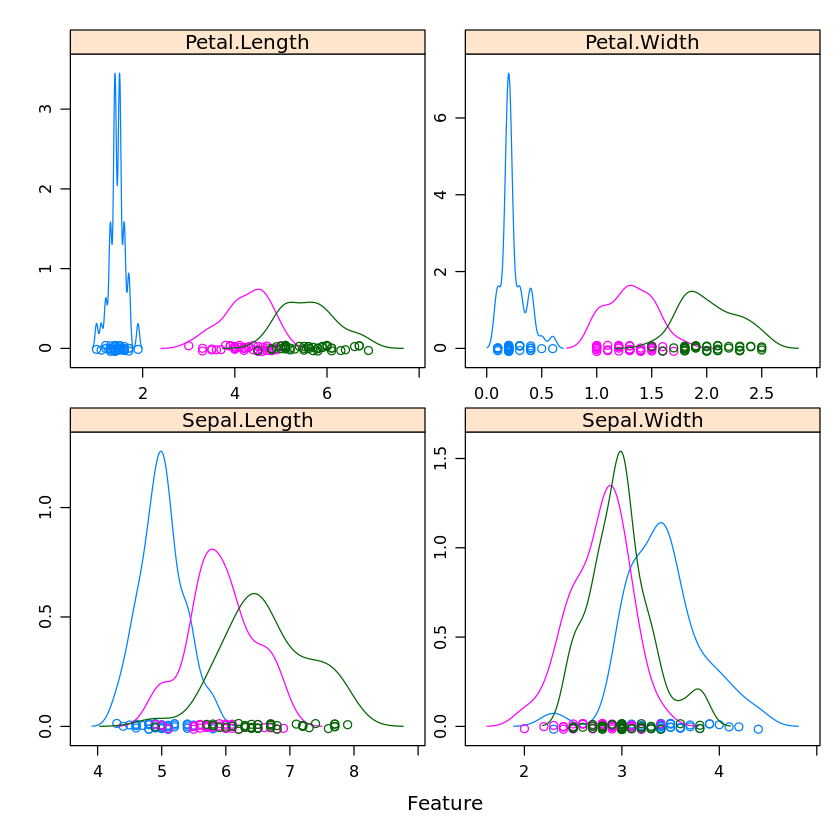

In [55]:
#separation by class
scales <- list(x=list(relation="free"), y=list(relation="free"))
featurePlot(x=x, y=y, plot="density", scales=scales)

In [56]:
#test algorithms
control <- trainControl(method="cv", number=10)
metric <- "Accuracy"

In [57]:
# a) linear algorithms
set.seed(7)
fit.lda <- train(Species~., data=dataset, method="lda", metric=metric, trControl=control)
# b) nonlinear algorithms
# CART
set.seed(7)
fit.cart <- train(Species~., data=dataset, method="rpart", metric=metric, trControl=control)
# kNN
set.seed(7)
fit.knn <- train(Species~., data=dataset, method="knn", metric=metric, trControl=control)
# c) advanced algorithms
# SVM
set.seed(7)
fit.svm <- train(Species~., data=dataset, method="svmRadial", metric=metric, trControl=control)
# Random Forest
set.seed(7)
fit.rf <- train(Species~., data=dataset, method="rf", metric=metric, trControl=control)

In [58]:
results <- resamples(list(lda=fit.lda, cart=fit.cart, knn=fit.knn, svm=fit.svm, rf=fit.rf))
summary(results)


Call:
summary.resamples(object = results)

Models: lda, cart, knn, svm, rf 
Number of resamples: 10 

Accuracy 
          Min.   1st Qu.    Median      Mean 3rd Qu. Max. NA's
lda  0.8333333 1.0000000 1.0000000 0.9750000       1    1    0
cart 0.7500000 0.8541667 0.9583333 0.9250000       1    1    0
knn  0.9166667 0.9166667 1.0000000 0.9666667       1    1    0
svm  0.7500000 0.9375000 1.0000000 0.9500000       1    1    0
rf   0.8333333 0.8541667 1.0000000 0.9416667       1    1    0

Kappa 
      Min. 1st Qu. Median   Mean 3rd Qu. Max. NA's
lda  0.750 1.00000 1.0000 0.9625       1    1    0
cart 0.625 0.78125 0.9375 0.8875       1    1    0
knn  0.875 0.87500 1.0000 0.9500       1    1    0
svm  0.625 0.90625 1.0000 0.9250       1    1    0
rf   0.750 0.78125 1.0000 0.9125       1    1    0


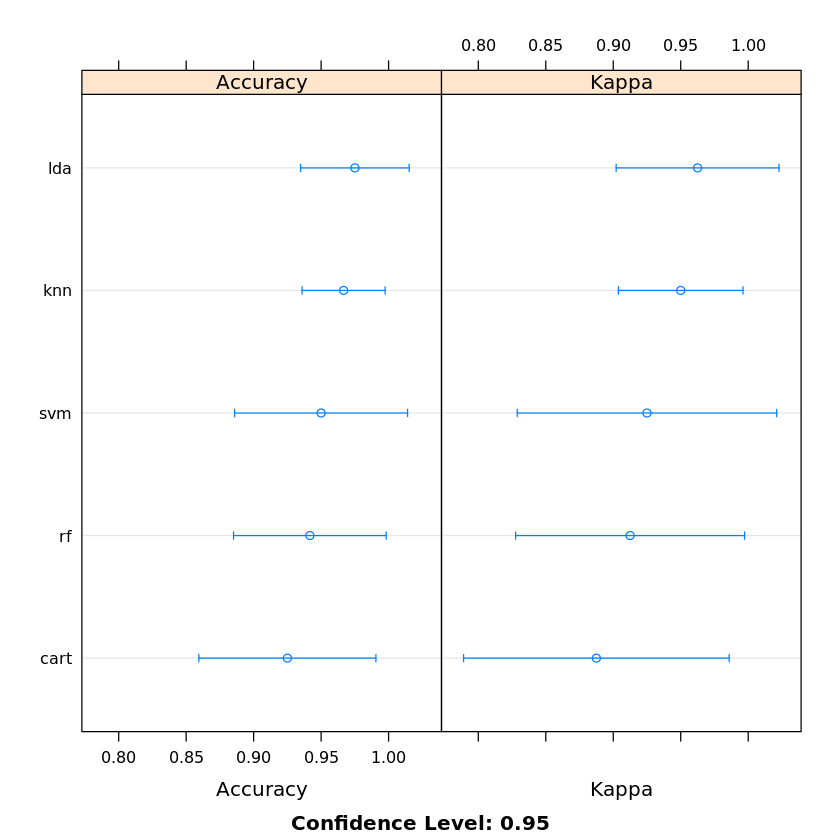

In [59]:
#comparing accuracy of the different models
dotplot(results)

In [60]:
#summary of best model
print(fit.lda)

Linear Discriminant Analysis 

120 samples
  4 predictor
  3 classes: 'setosa', 'versicolor', 'virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 108, 108, 108, 108, 108, 108, ... 
Resampling results:

  Accuracy  Kappa 
  0.975     0.9625



In [62]:
#base on validation dataset
predictions <- predict(fit.lda, validation)
confusionMatrix(predictions, validation$Species)

Confusion Matrix and Statistics

            Reference
Prediction   setosa versicolor virginica
  setosa         10          0         0
  versicolor      0         10         0
  virginica       0          0        10

Overall Statistics
                                     
               Accuracy : 1          
                 95% CI : (0.8843, 1)
    No Information Rate : 0.3333     
    P-Value [Acc > NIR] : 4.857e-15  
                                     
                  Kappa : 1          
                                     
 Mcnemar's Test P-Value : NA         

Statistics by Class:

                     Class: setosa Class: versicolor Class: virginica
Sensitivity                 1.0000            1.0000           1.0000
Specificity                 1.0000            1.0000           1.0000
Pos Pred Value              1.0000            1.0000           1.0000
Neg Pred Value              1.0000            1.0000           1.0000
Prevalence                  0.3333            